Part I:-

In [19]:
import numpy as np
from matplotlib.colors import ListedColormap

# XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])#Input
y = np.array([0, 1, 1, 0]) #Output

In [20]:
class MCPNeuron:
    def __init__(self, input_size, epochs=1000, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.epochs = epochs
        self.learning_rate = learning_rate

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        weighted_sum = np.dot(X, self.weights) + self.bias
        return self.activation(weighted_sum)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error

# Initialize and train the perceptron
neuron = MCPNeuron(input_size=2)
neuron.fit(X, y)

In [21]:
for inputs in X:
    print(f"Input: {inputs}, Predicted Output: {neuron.predict(inputs)}")

Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0


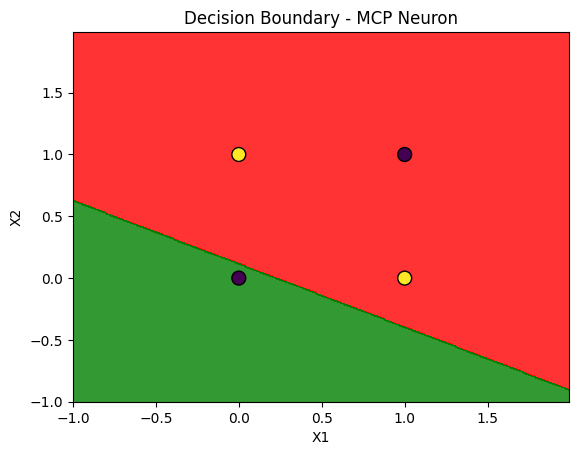

In [22]:
# MCPNeuron Visualization:-
def plot_decision_boundary_mcp(neuron, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.array([neuron.predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', marker='o')
    plt.title('Decision Boundary - MCP Neuron')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_decision_boundary_mcp(neuron, X, y)

In [ ]:
# Observation:-
# Since XOR is not linearly separable,
# the single-layer perceptron will fail to classify XOR properly.
# We can observe its performance by testing on the XOR inputs:
# We will observe incorrect predictions due to the limitations of a single-layer perceptron.

In [23]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', max_iter=1000)
mlp.fit(X, y)

# Testing the MLP
predictions = mlp.predict(X)
for i, prediction in enumerate(predictions):
    print(f"Input: {X[i]}, Predicted Output: {prediction}, True Output: {y[i]}")


# Observation:-
# As we can see the correct predicted outputs by using Multi layer perceptron model

Input: [0 0], Predicted Output: 1, True Output: 0
Input: [0 1], Predicted Output: 0, True Output: 1
Input: [1 0], Predicted Output: 1, True Output: 1
Input: [1 1], Predicted Output: 0, True Output: 0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


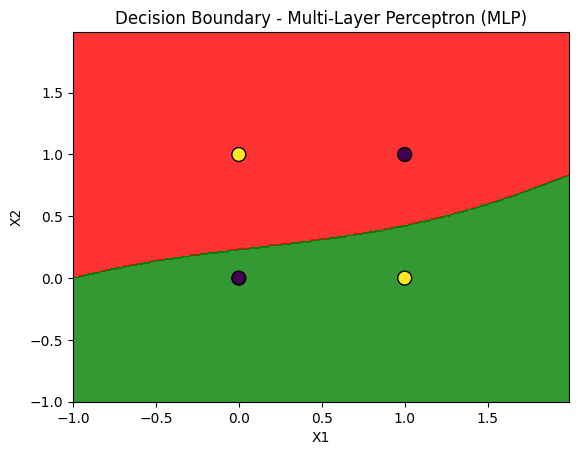

In [24]:
# MLP:-
def plot_decision_boundary_mlp(mlp, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', marker='o')
    plt.title('Decision Boundary - Multi-Layer Perceptron (MLP)')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_decision_boundary_mlp(mlp, X, y)

In [ ]:
# Inference:
# Single Layer Perceptron: Did not classify XOR properly because it is not linearly separable.
# Multi-Layer Perceptron: Successfully classifies XOR by introducing a hidden layer.

Part II:-

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


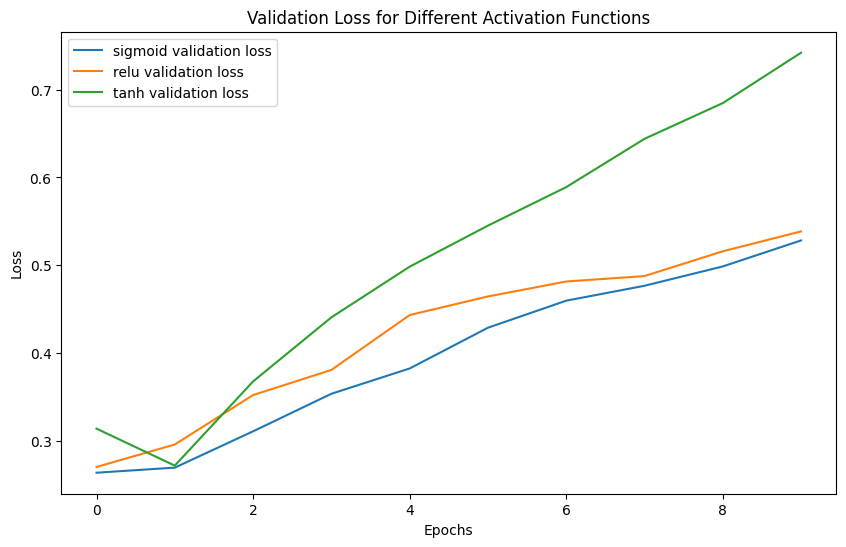

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8822 - loss: 0.5742
Test accuracy: 88.73%
Initial weights:
[[-0.00621113  0.0396012   0.03352049  0.00254942 -0.00497034]
 [ 0.06828376  0.01341671  0.05024546 -0.00335813  0.03578541]
 [-0.01774701  0.05143006  0.07470955  0.06767802  0.01060628]
 [-0.02025356  0.03332454 -0.02888389  0.00256053  0.01856954]
 [ 0.00960866 -0.01866993  0.04719247  0.04641287  0.0089849 ]]

Updated weights after one epoch:
[[-0.00441195  0.03959814  0.03352056  0.00277839 -0.00489022]
 [ 0.06852453  0.01341629  0.05024552 -0.00328044  0.03580695]
 [-0.01589268  0.05142946  0.0747096   0.06928124  0.01066311]
 [-0.01839543  0.03332395 -0.02888331  0.00273483  0.01861202]
 [ 0.00997481 -0.01867307  0.04719284  0.04755663  0.00909312]]

Weight changes:
[[ 1.7991792e-03 -3.0659139e-06  7.4505806e-08  2.2897217e-04
   8.0116559e-05]
 [ 2.4077296e-04 -4.1630119e-07  5.2154064e-08  7.7689299e-05
   2.1535903e-05]
 [ 1.8543266e-03 -5.9977174e-07  5.2154064e-0

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv('Tweets.csv')
df['label'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Feature extraction
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model(activation='relu'):
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with different activation functions
activations = ['sigmoid', 'relu', 'tanh']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=10, batch_size=32, verbose=0)
    histories[activation] = history

# Plot loss over epochs for each activation function
plt.figure(figsize=(10, 6))
for activation, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{activation} validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss for Different Activation Functions')
plt.show()

# Evaluate the best model (assuming ReLU performs best, which is often the case)
best_model = create_model('relu')
best_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Demonstrate weight updates during backpropagation
initial_weights = best_model.get_weights()[0][:5, :5]  # Get a small subset of weights
best_model.fit(X_train[:100], y_train[:100], epochs=1, batch_size=32, verbose=0)
updated_weights = best_model.get_weights()[0][:5, :5]

print("Initial weights:")
print(initial_weights)
print("\nUpdated weights after one epoch:")
print(updated_weights)
print("\nWeight changes:")
print(updated_weights - initial_weights)
